<h1 align="center">Applied Statistics Assignment 4</h1>

In [1]:
!pip install pandas.datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
#importing libraries
from pandas_datareader import wb
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

We now download and plot the entire world GDP time series.

/usr/local/lib/python3.8/dist-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: WLD
  warnings.warn(


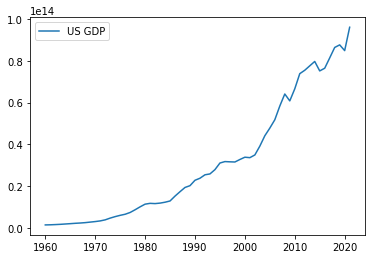

In [35]:
gdp_data = wb.download (indicator='NY.GDP.MKTP.CD', country='WLD',
start='1960', end='2021')
time = np.arange(1960,2022)
gdp = gdp_data.iloc[:,0].astype(float).to_numpy()
gdp = np.flip(gdp)

plt.plot(time, gdp, label='US GDP')
plt.legend()
plt.show()

**Question 1**

If the growth rate was a constant r, then the world's GDP would grow as, $GDP_{k} = GDP_{0}(1+r)^k$. This equation is not linear. To get a linear relationship, we take natural logarithm on both sides.

In [36]:
#we apply the logarithm transformation to the GDP equation
gdp_transforrmed_list = [math.log(i) for i in gdp]
gdp_transformed_array = np.array(gdp_transforrmed_list)

We now create a dataframe from the numpy array.

In [37]:
time_length = np.arange(0,len(time))
gdp_dataframe = pd.DataFrame(gdp_transformed_array)
gdp_dataframe.rename(columns = {0:'GDP_Transformed'}, inplace = True)
gdp_dataframe['Time_Length'] = time_length
gdp_dataframe

,GDP_Transformed,Time_Length
0,27.961801,0
1,28.001476,1
2,28.069469,2
3,28.144651,3
4,28.235336,4
...,...,...
57,32.030445,57
58,32.090160,58
59,32.104405,59
60,32.072575,60


In [38]:
#regression against time variable
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

X = gdp_dataframe['Time_Length'].values.reshape(-1,1)
y = gdp_dataframe['GDP_Transformed'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 28.255 + 0.071541X


In [39]:
#printing regression results
X1 = gdp_dataframe['Time_Length']
Y1 = gdp_dataframe['GDP_Transformed']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1692.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.14e-45
Time:                        08:37:41   Log-Likelihood:                0.23096
No. Observations:                  62   AIC:                             3.538
Df Residuals:                      60   BIC:                             7.792
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.2554      0.061    459.446      0.0

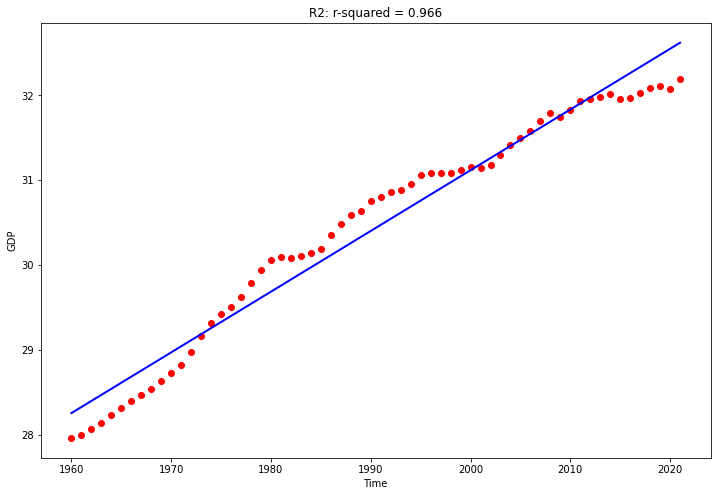

In [40]:
predictions = reg.predict(X)
plt.figure(figsize=(12, 8))
#scatter plot of gdp data after transformation
plt.scatter(
    time,
    gdp_dataframe['GDP_Transformed'],
    c='red'
)
#regression line
plt.plot(
    time,
    predictions,
    c='blue',
    linewidth=2
)
#printing r square value
plt.title('R2: ' + str("r-squared = {:.3f}".format(r2_score(gdp_dataframe['GDP_Transformed'], predictions))))
plt.xlabel("Time")
plt.ylabel("GDP")
plt.show()

In [41]:
#computing residuals
residuals = np.array(gdp_transforrmed_list) - np.array(predictions).flatten()

In [42]:
#printing mean and standard deviation of residuals
print(np.mean(residuals))
print(np.std(residuals))

1.203338504109847e-15
0.24107101576840845


In [43]:
#k-s test
from scipy.stats import kstest
from scipy.stats import norm

kstest(residuals,'norm')

KstestResult(statistic=0.35468938736637456, pvalue=1.7472707766374504e-07)

Since $\alpha = 0.99$, the significance value is $ 1-0.99=0.01$. The p-value we got is less than 0.01. So, we can reject the null hypothesis that that the residuals are sampled from a normal distribution.

The inverse transformation of logarithm is exponent. So, we apply the exponent operation to our linear model.

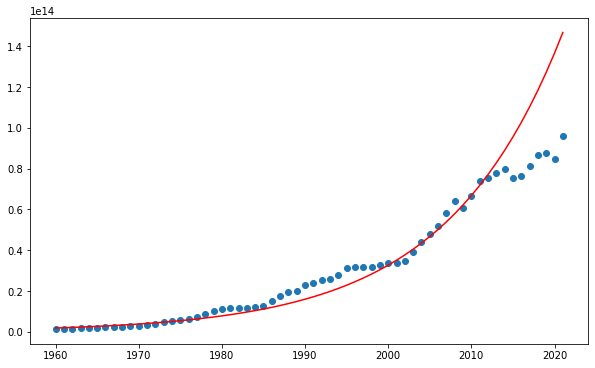

In [44]:
#scatterplot of original data points
plt.figure(figsize=(10, 6))
plt.scatter(time, gdp)
#non-linear model
plt.plot(time, np.exp(predictions), color='red')
plt.show()

The relationship between slope and growth rate is, <br>
<center>$\large ln(1+r) = slope$ <br></center>

Applying exponent operation on both sides,
<center>$\large 1+r = e^{slope}$ <br></center>

Therefore,
<center>$\large r = e^{slope}-1$ <br></center>

In [45]:
#print growth rate from the formula derived
slope, _ = np.polyfit(time_length, predictions, 1)
growth_rate = np.exp(slope)-1
print(growth_rate)

[0.07416175]


From 2015, the prediction of our model does not match with the actual gdp. Because, according to the our model, the rate of increase is greater than the actual increase in gdp data. Intuitively this makes sense as we would not expect gdp to increase at such a rapid rate.

**Question 2**

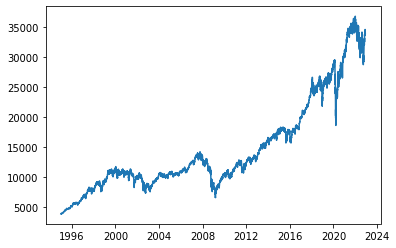

In [46]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
data = web.DataReader('^DJI','yahoo',start ='1995-01-01', end='2022-12-05')
data = data.reset_index()
dates = data["Date"]
dow = data["Close"].to_numpy()
plt.plot(dates,dow)
plt.show()

In [47]:
lags_list=[1,2,3,5,10,15,20,30]
lags_arr=np.array(lags_list)

Now, for each lag in lags we compute and plot the history of the 60-day rolling autocorrelation of dow.

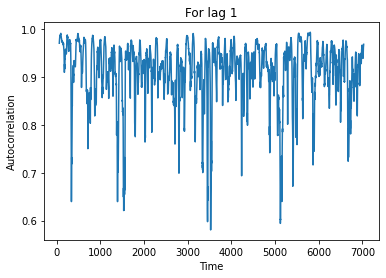

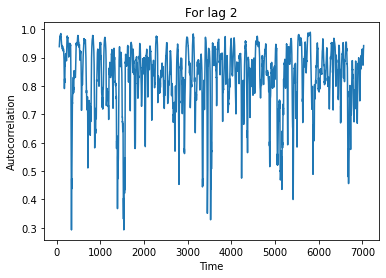

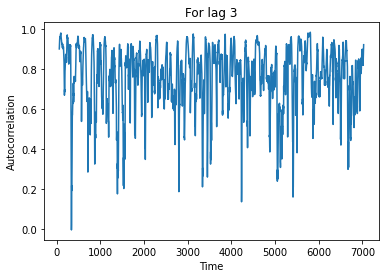

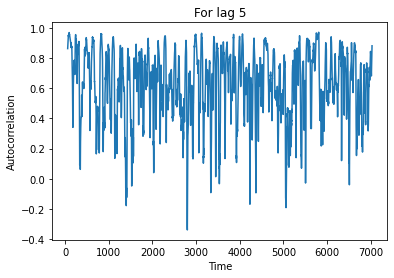

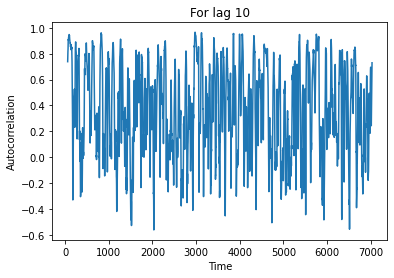

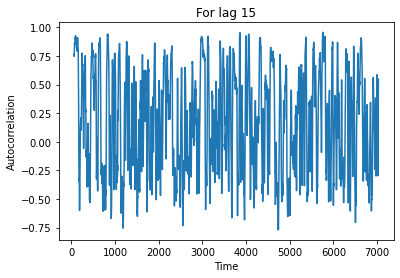

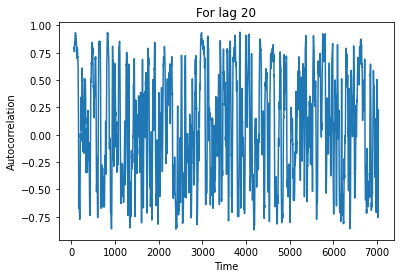

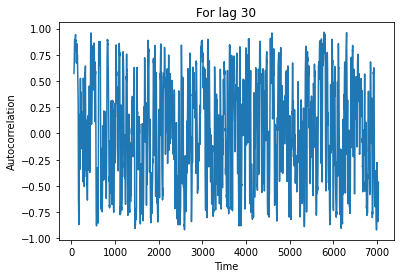

In [59]:
for item in lags_arr:
  corr = data["Close"].rolling(60).apply(lambda x: x.autocorr(lag=item))
  plt.plot(corr)
  plt.xlabel("Time")
  plt.ylabel("Autocorrelation")
  plt.title(str("For lag {0}".format(item)))
  plt.show()

Now, we compute the average of the autocorrelation times series computed and plot the autocorrelation against lag.

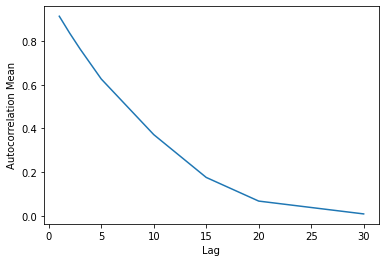

In [60]:
ac_mean_list=[]
for item in lags_arr:
    ac_mean = np.mean(data["Close"].rolling(60).apply(lambda x: x.autocorr(lag=item)))
    ac_mean_list.append(ac_mean)
plt.plot(lags_arr,ac_mean_list)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation Mean")
plt.show()

For a time-series data to be considered white noise, it should meet the following criteria, <br>

 1.Zero Mean <br>

 2.Constant or unchaging variance/standard deviation <br>

 3.Zero Autocorrelation at all lags <br>

From observation it is clear that Dow Jones is not a white noise process. Because as lag increases, the autocorrelation decreases. 

Vector Auto Regressive (VAR) Model would work better here. Here, we model each variable as a function of past values. 

The pct_change(1) function gives us $\frac{Close_{t}} {Close_{t-1}}-1$. We multiply it by 100 to get Daily_return.

In [61]:
data['Daily_return'] = data['Close'].pct_change(1) * 100

In [62]:
data

,Date,High,Low,Open,Close,Volume,Adj Close,Daily_return
0,1995-01-03,3845.199951,3827.709961,3834.399902,3838.479980,24440000,3838.479980,NaN
1,1995-01-04,3857.989990,3831.070068,3838.500000,3857.649902,27220000,3857.649902,0.499414
2,1995-01-05,3860.679932,3843.189941,3857.600098,3850.919922,25810000,3850.919922,-0.174458
3,1995-01-06,3887.260010,3841.840088,3850.899902,3867.409912,30240000,3867.409912,0.428209
4,1995-01-09,3874.479980,3853.280029,3867.399902,3861.350098,20820000,3861.350098,-0.156689
...,...,...,...,...,...,...,...,...
7027,2022-11-29,33933.910156,33662.449219,33847.800781,33852.531250,279750000,33852.531250,0.009070
7028,2022-11-30,34589.769531,33583.769531,33795.429688,34589.769531,524440000,34589.769531,2.177794
7029,2022-12-01,34595.511719,34129.351562,34533.589844,34395.011719,348720000,34395.011719,-0.563050
7030,2022-12-02,34483.210938,34039.730469,34265.449219,34429.878906,290580000,34429.878906,0.101373


In [63]:
data2 = pd.DataFrame().assign(Daily_return=data['Daily_return'])

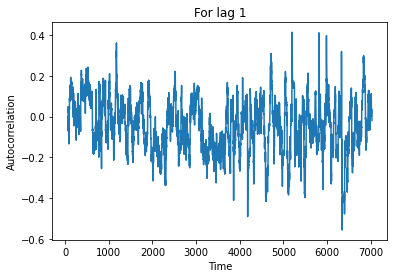

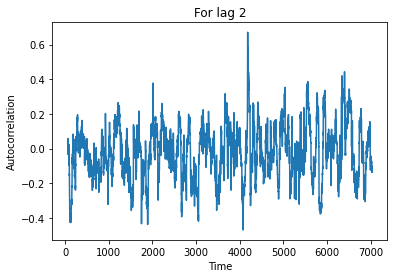

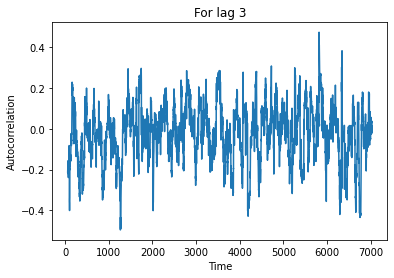

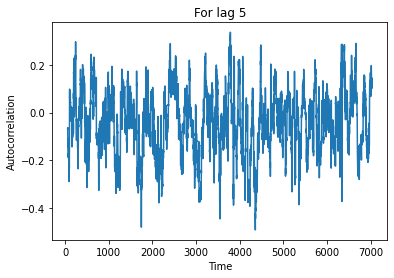

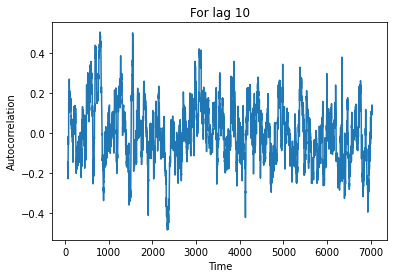

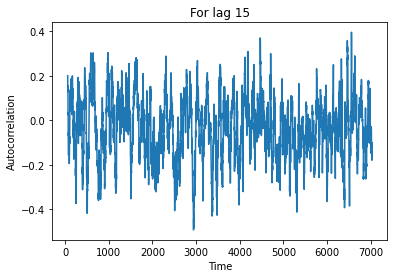

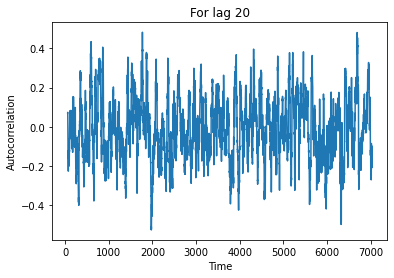

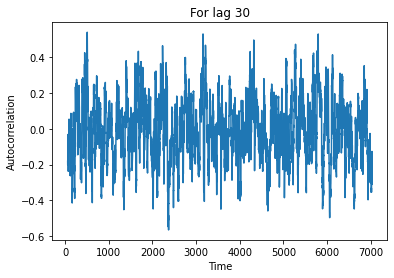

In [65]:
for item in lags_arr:
  corr2 = data2["Daily_return"].rolling(60).apply(lambda x: x.autocorr(lag=item))
  plt.plot(corr2)
  plt.xlabel("Time")
  plt.ylabel("Autocorrelation")
  plt.title(str("For lag {0}".format(item)))
  plt.show()

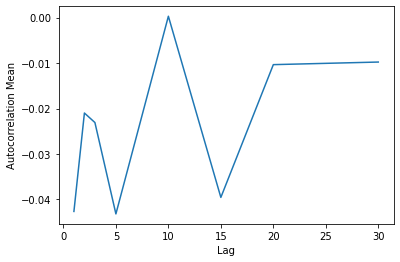

In [66]:
ac_mean_list2=[]
for item in lags_arr:
    ac_mean2 = np.mean(data2["Daily_return"].rolling(60).apply(lambda x: x.autocorr(lag=item)))
    ac_mean_list2.append(ac_mean2)
plt.plot(lags_arr,ac_mean_list2)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation Mean")
plt.show()

For all the given lags, the autocorrelation value is very close to zero. We can conclude that this is a white noise process from this observation.